In [13]:
import numpy as np
import math
import matplotlib

import matplotlib.pyplot as plt
import glob
import time

from ipywidgets import IntProgress
from IPython.display import display
import re

In [2]:
#Set latex environment for plots/labels
# matplotlib.rc('font', **{'family': 'serif'})
matplotlib.rc('text', usetex=False)
matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams.update({'font.family':'serif'})


fl=22
fm=18
fs=16

<ipython-input-2-47b328886674>:4: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']


In [3]:
# this is just a little function that we will use to make the plot more beautiful (bigger ticks, labels)
# However, you do not have to use this (just uncommoment "layoutAxes" everywhere)
from matplotlib.ticker import (FormatStrFormatter,
                               AutoMinorLocator)

def layoutAxes(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = 18, second=False, labelpad=None, setMinor=True):
    """
    Tiny code to do the layout for axes in matplotlib
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5
    
    #rc('axes', linewidth=2)
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')
    ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad)#,fontweight='bold')
    ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad)#, fontweight='bold')    
    
    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax


In [4]:
# Define the location of the posterior data
pulsar_data_loc = "../correctedPulsarPosteriors/correctedVtData"

In [16]:
# Takes about 23 s
start = time.time()

vt_all = []
pulsar_names = []

f = IntProgress(min=0, max=len(glob.glob('../correctedPulsarPosteriors/correctedVtData/*.bootstraps'))) # instantiate the bar
display(f) # display the bar

for file in glob.glob('../correctedPulsarPosteriors/correctedVtData/*.bootstraps'):
    f.value +=1
    vt_all.append(np.loadtxt(file, unpack=True, usecols=5))
    name = re.search('VtData/(.+?).corr', file).group(1)
    pulsar_names.append(name)

end = time.time()
print(end - start, "s")



IntProgress(value=0, max=89)

23.548511743545532 s


In [17]:
print(pulsar_names[10])

J0157+6212


In [76]:
div1 = int(len(vt_all)/4)
div2 = 2*int(len(vt_all)/4)
div3 = 3*int(len(vt_all)/4)
divisions = [[0, div1], [div1, div2], [div2, div3], [div3, len(vt_all)]]

In [77]:
for plot_range in divisions:
    print(range(plot_range[0], plot_range[1]))

range(0, 22)
range(22, 44)
range(44, 66)
range(66, 89)


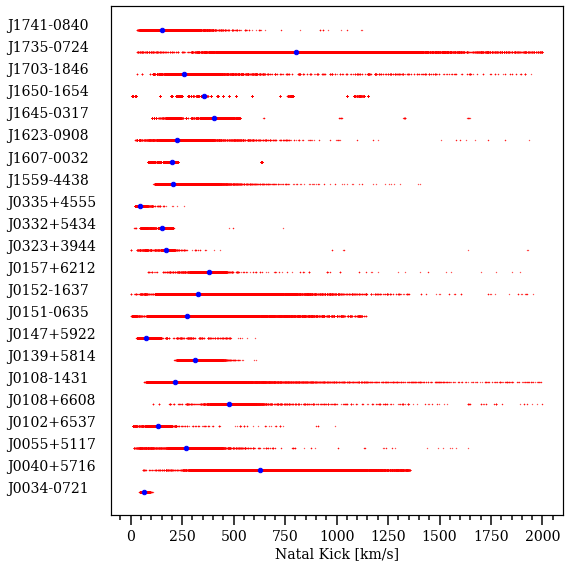

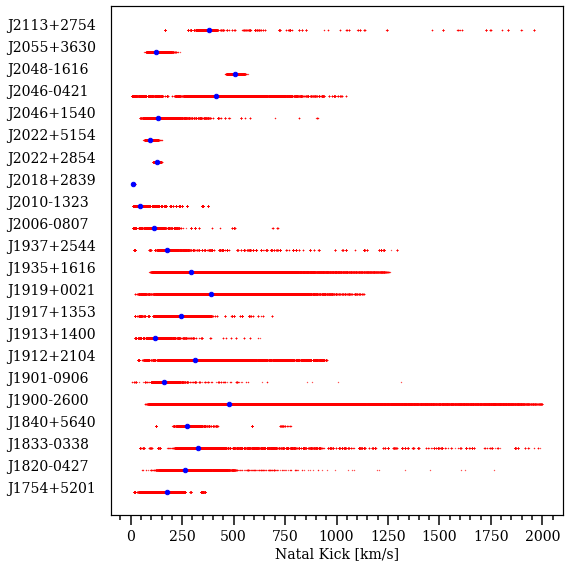

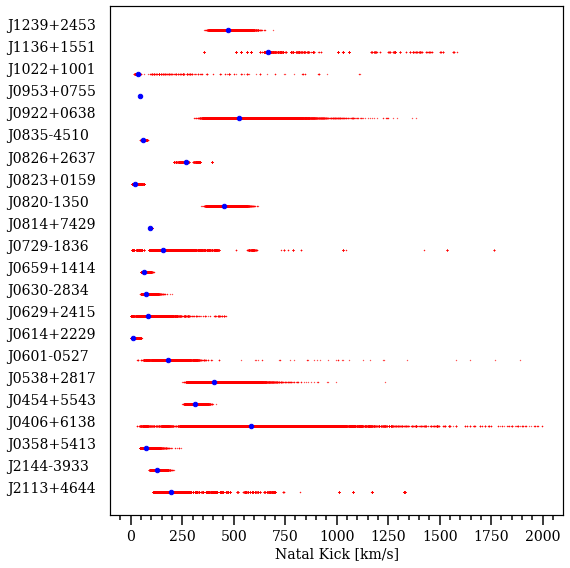

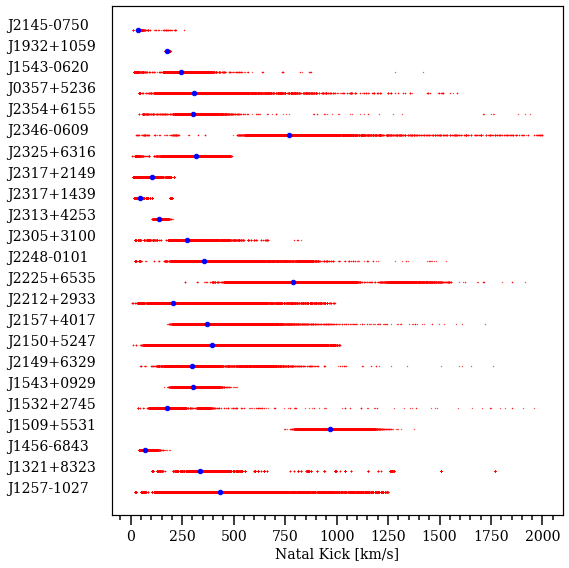

In [83]:
sm = 0.1
sl = 20

for plot_range in divisions:
    f, ax= plt.subplots(1, 1,  figsize=(8,8)) 
    for i in range(plot_range[0], plot_range[1]):
        pd = vt_all[i]
        pn = pulsar_names[i]
        y_pos = i
        ax.text(-600, y_pos, pn, fontsize=14) # plot pulsar name

    #     ax.hlines(y=y_pos, xmin=np.min(pd), xmax=np.max(pd), linewidth=2, color='r')

        y_pos_all = np.full(len(pd), i)
        ax.scatter(pd, y_pos_all, s=sm, color='r')

        ax.scatter(np.average(pd), y_pos, s=sl, color='b')


    ax.get_yaxis().set_visible(False)    
    layoutAxes(ax=ax, nameX='Natal Kick [km/s]',\
                   nameY='', fontsize=14)
    plt.tight_layout()
    plt.savefig(f'plots/pulsar_data_{plot_range[0]}_to_{plot_range[1]}.png', dpi=300)
    plt.show()